A good understanding of what is happening under the hood can help us finding the appropriate model, the right training algorithm and a good set of hyperparameters for a specific task. 

It will also help with debug issues and perform error analysis more efficienly.

# Linear Regression

A linear model predicts by simply computing a weighted sum of the input features, plus a constant (intercept) called the _bias term_ 

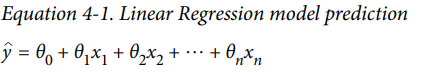

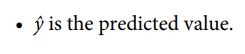

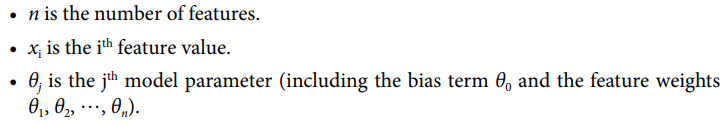
 

#### Vectorized form

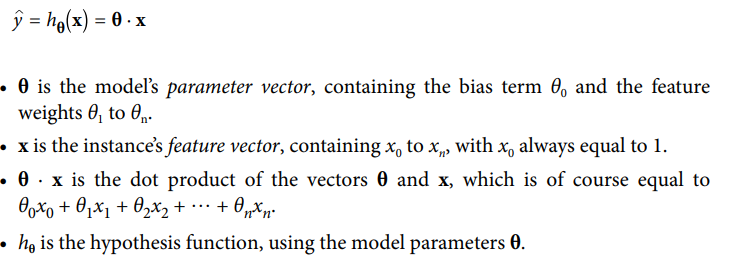

In Machine Learning, vectors are often represented as column vectors, 2D arrays with a single column. if $\theta$ and $x$ are column vecotrs, then the prediction becomes $\theta^\top x$, where $\theta^\top$ is the _transpose_ of $\theta$ and $\theta^\top x$ is a matrix multiplication.

## How do we train it?

Training &rarr; setting its parameters so that the model best fits the training set. For Linear Regression, we find $\theta$ that minimizes MSE 

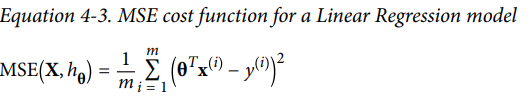



### The Normal Equation

To find $\theta$, that minimizes the cost function, there is a _closed-form solution_ &rarr; a mathematical equation that gives the result directly. This is called the _Normal Equation_

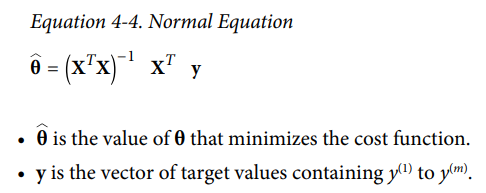

### Linear Regression on Scikit-Learn

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X, y)

lin_reg.intercept_, lin_reg.coef_

lin_reg.predict(X_new)


The LinearRegression class is based on the _least squares_ function. It uses an SVD (single value decompostion approach) 

#### Computational Complexity

Inverting an n+1 (features) dimension Matrix is a O(n**2.4)

The approach done by Scikit-Learn is O(n**2)
 
Both the SVD and the Normal Equation get very slow once the number of features grow large (e.g., 100.000). Once you have trained your Linear Regression model, predictions are very fast

## Gradient Descent

When there is a large number of features, or too many training instances to fit in memory.

Gradient Descent is a generic optimization algorithm capable of finding optimal solutions to a wide range of problems &rarr; it tweaks parameters iteratively in order to minimize a cost function.

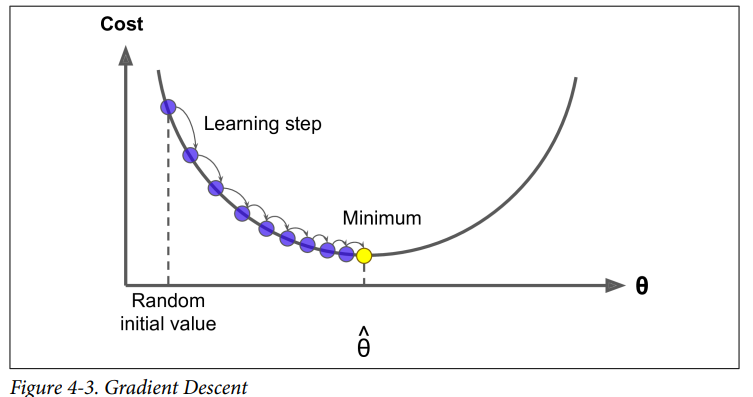


Gradient Descent measures the local gradient of the error function with regards to parameter vector $\theta$, and it goes in the direction of descending gradient. Once the gradient is zero, we have reached a minimum.

Start filling $\theta$ with random values (_random initialization_), gradually decrease the cost function (MSE) until it converges to a minimum.
The decrease is caused by the size of steps, called _learning rate_ hyperparemeter.

#### When using Gradient Descent, you should ensure that all features have a similar scaler (Scikit-Learn's StandardScaler)


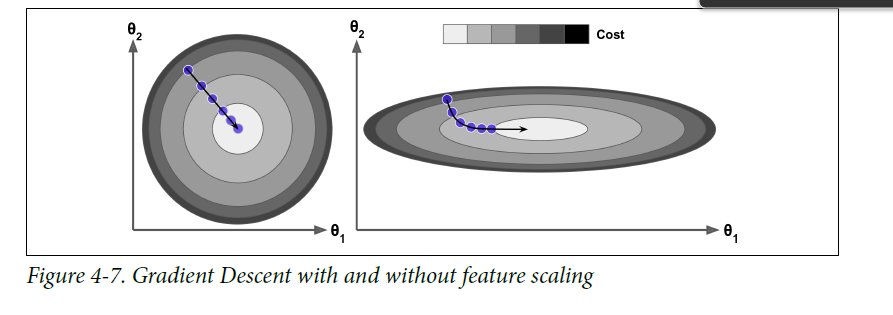

##  Batch Gradient Descent

Gradient descent computes the gradient of the cost function with regards to each model parameter $\theta_{j}$, in other words, how much the cost function changes if you change $\theta_{j}$ a little bit. 

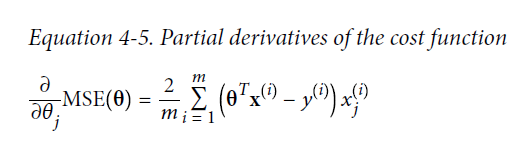

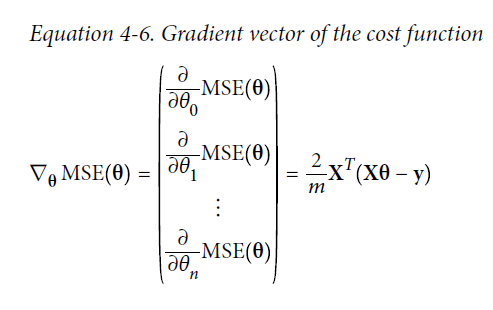

Since it calculates over the full training set $X$, it is called _Batch Gradient Descent_: it uses the whole batch of training data at every step &rarr; slow on very large training sets.

However, Gradient Descent scales well with the number of features: for a large number of features, it us much faster than SVD or using the Normal Equation

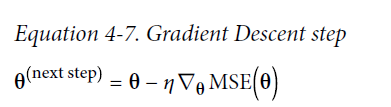

### Finding the learning rate

We can use GridSearch. However, we want to limit the number of iterations so that grid search can eliminate models that take too long to converge. 

Finding the number of iterations is also a challenge: if the number is too low, we will still be far away from the optimal result, if it is too high, it will take time and we also will waste time while the model parameters do not change anymore.

The solution is to set to a very larger number of iterations but to interrupt the algorithm as soon as the gradient vector becomes tiny &rarr; less than a number $\epsilon$ (tolerance) 

### Convergence Rate

When the cost function is convex and its slope does not change abruptly, Batch Gradient DEscent with a fixed learning rate will eventually converge to the optimal solution.

## Stochastic Gradient Descent

Batch Gradient Tescent uses the whole training set to compute the gradients at every step. _Stochastic Gradient Descent_ picks a random instance in the training set at every step and computes the gradients based on that single instance. It can be implemented as out-of-core algorithm.

However, due to its stochastic (i.e., random) nature, this algorithm is much less regular than Batch Gradient Descent. The cost function will bounce up and down, decreasing only on average.

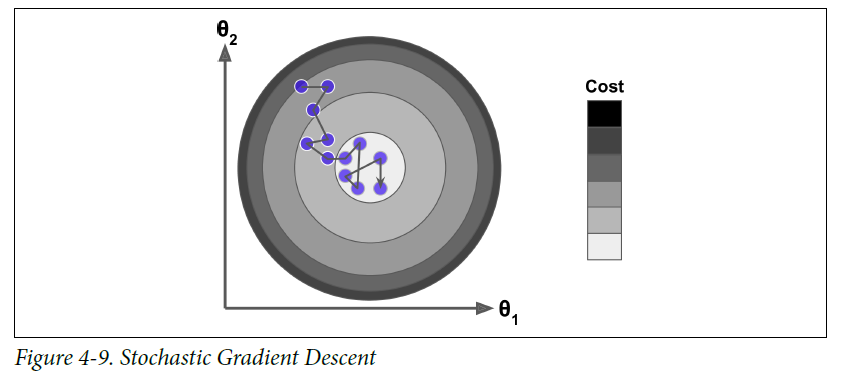


When using Stochastic Gradient Descent, the training instances must  be IID: to ensure this, shuffle the instances during training


In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

## Mini-batch Gradient Descent

Same idea as the Stochastic Gradient Descent, but rather than using one sample per epoch, it uses a small amoun of samples to compute the gradient 

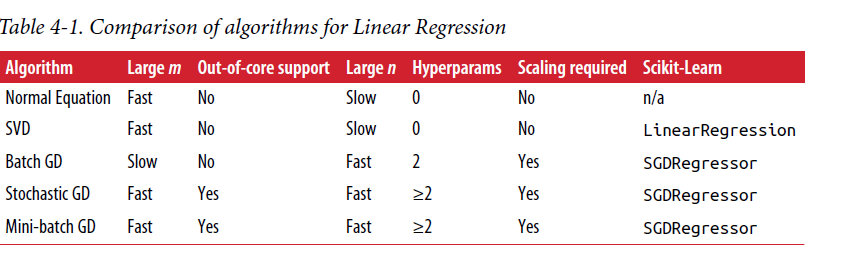

# Polynomial Regression

If the data is more complex than a straight line, we can actually use a linear model to fit nonlinear data: add powers of each feature as new features, then train a linear model on this extended set of features

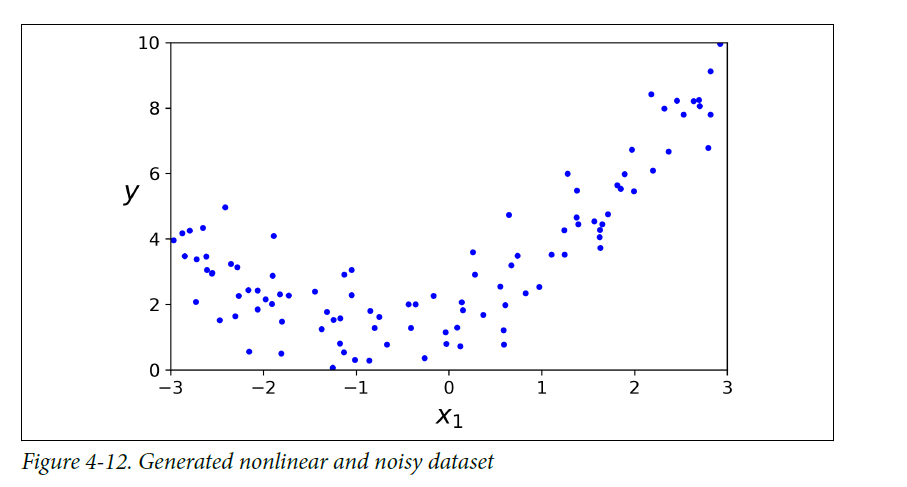

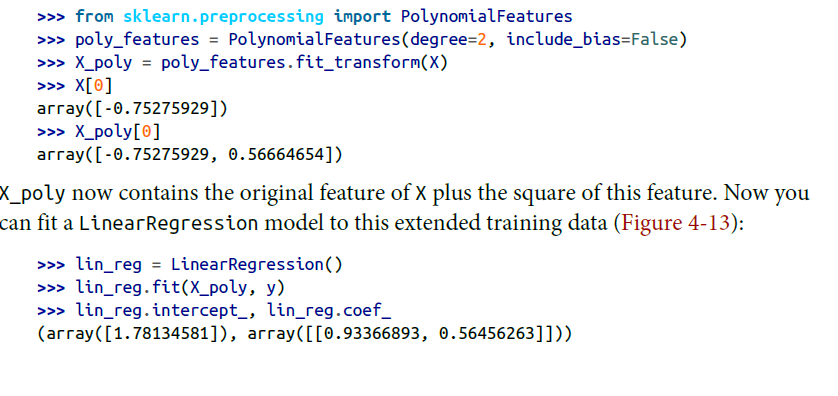

# Learning Curves

A high degree Polynomial Regression tends to overfit the data.

How to decied how complex the model should be? How can we tell when the model is overfitting or underfitting the data?

One way is using cross-validation to get an estimate of a model's generalization performance. If a model performs well on the training data but generalizes poorly according to the cross-validation metrics, then it is overfitting. If it performs poorly on both, then is underfitting.

Another way is to look at the _learning curvers_: plots of the model's performance on the tranining set and validation set as a function of the training set size.

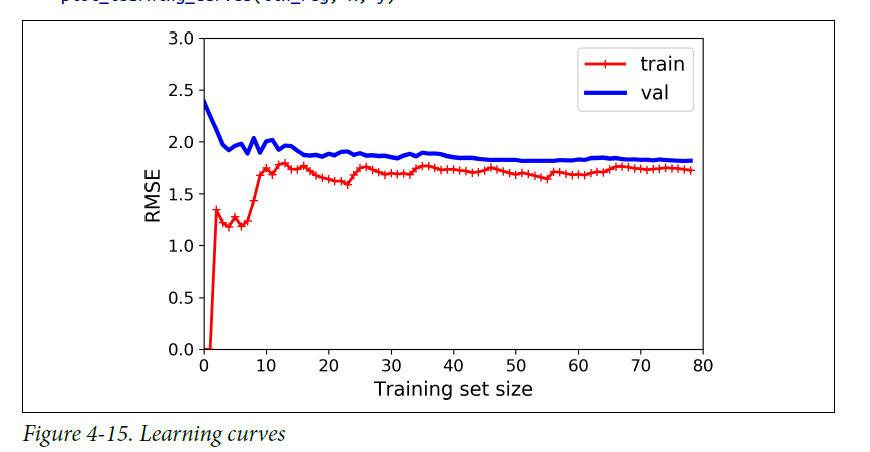

Learning Curve of a underfitting model: both curves have reached a plateau, they are close and fairly high.

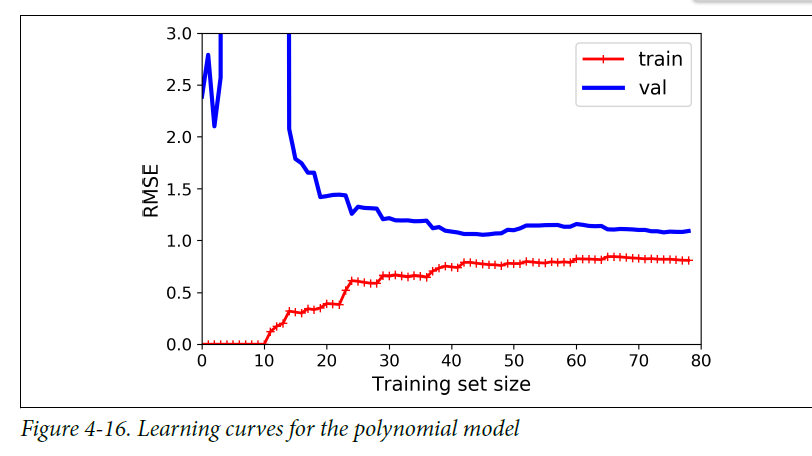

Learning Curve of a overfitting model: error in the training data is much lower than with Linear Regression model. Also, there is a gap between the curves. The model performs significantly better on the training data than on the validation data.


<b>If the model is underfitting the training data, adding more training examples will not help. We need to use a more complex model or come up with better features.
   
<b>If the model is overfitting, one way to improve it is to feed it more training data until the validation error reaches the training error. 
</b>

# The Bias/Variance Tradeoff

<b>A model's generalization error can be expressed as the sum of three very different errors: Bias, Variance and Irreducible error</b>

#### Bias
Bias is a part of the generalization error caused by wrong assumptions. For instance, assuming the data is linear when it is actually qudratic. A high-bias model is most likely to underfit the training data.

#### Variance
Variance is caused due to the excessive sensitivity to small variations in the training data. A model with many degrees of freedom is likely to have high variance, overfitting the data.

#### Irreducible error
Cause by the noisiness (unwanted behavior) of the data itself &rarr; fixing of data sources, outliers, etc



# Regularized Linear Models

## Ridge Regression

Regularized version of Linear Regression:  a _regularization term_ is added to the cost function, forcing the model to not only fit the data but also keep the model weights as small as possible, adding a little bias into the parameters, but reducing its variance. 

The Ridge Regression Penalty results in a line that has a smaller slope, making it less sensitive to the parameter.

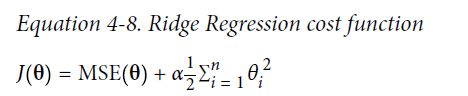

Obs: The regularization term should be added only to the cost function during training.

As for most regularized models, it is important to scale the data before performing Ridge Regression.

We can calculate Ridge Regression using the closed form-solution or Stochastic Gradient Descent (remember: large number of features &rarr; Gradient Descent, small number of features &rarr; Normal Equation)

In [ ]:
# Normal Equation
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)

>>> ridge_reg.predict([[1.5]])


#Stochastic GD

sgd_reg = SGDRegressor(penalty="l2")

>>> sgd_reg.fit(X, y.ravel())
>>> sgd_reg.predict([[1.5]])

array([1.47012588])

## Lasso Regression

_Least Absolute Shrinkage and Selection Operartor Regression_ is another regularize version of Linear Regression: like Ridge regression, it adds a regularization term to the cost function

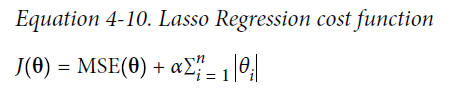

It uses smaller $\alpha$ values compared to Ridge. It also tends to complete eliminate weights of the least important features &rarr; Lasso Regression automatically performs feature selection and outputs a _sparse model_, being better than Ridge to reduce Variance in models that contains a lot of useless variables. In contrats, Ridge will perform better if we have a lot of useful variables.

In [ ]:
from sklearn.linear_model import Lasso

>>> lasso_reg = Lasso(alpha=0.1)
>>> lasso_reg.fit(X, y)
>>> lasso_reg.predict([[1.5]])

## Elastic Net

Middle ground between Lasso and Ridge Regression. The regularization term is a mix of the other two

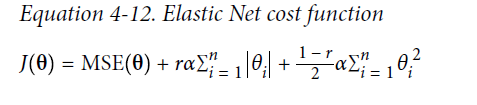

#### When to use Linear Regression, Ridge, Lasso or Elastic Net?

It is almost always preferable to have at least a bit of regularization &rarr; start with Ridge

If we suspect that only a few features are actually useful &rarr; Lasso or Elastic. If the number of featuers is greater than the number of training instances or several features are strongly correlated &rarr; Elastic Net



In [ ]:
>>> from sklearn.linear_model import ElasticNet
>>> elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
>>> elastic_net.fit(X, y)
>>> elastic_net.predict([[1.5]])
array([1.54333232])

### Early Stopping

Another way to regularize iterative learning algorithms as Gradient Descent is to stop training as soon as the validation error reacher a minimum. This is called _early stopping_ 

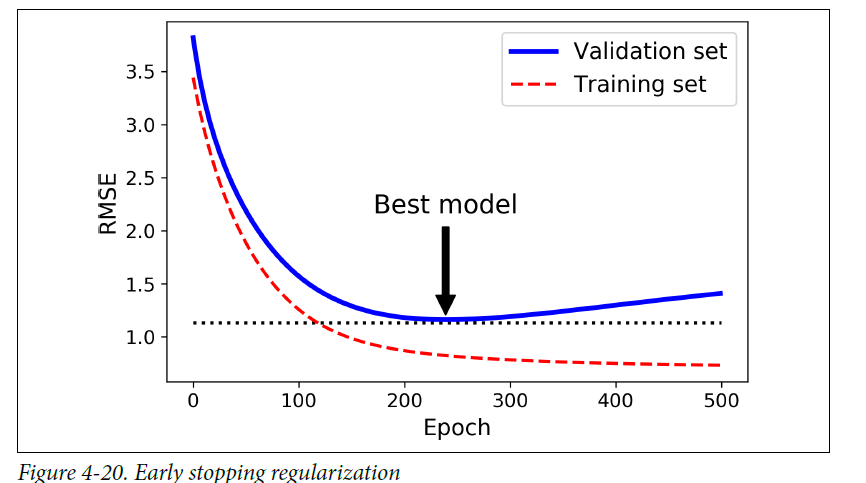

In [ ]:
from sklearn.base import clone

# prepare the data
poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                        penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

# Logistic Regression

_Logistic Regression_ is commonly used to estimate the probability that an istance belongs to a particular class. Instead of fitting a line into the data, it fits a _logistic function_. It is fit to the data using _maximum 
likelihood_.



In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

<div>
    <img src="attachment:.png" width="300">
</div>


Instead of fitting a line to the data, logistic regression fits an "S" shaped function &rarr; logistic function

<div>
    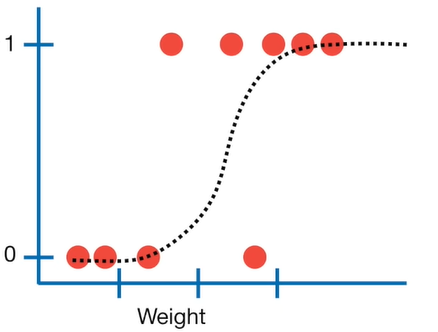
</div>

The logistic function gives us the probability that a instance belongs to a certain class. (in the image case, if a mouse is obese or not)

Logistic Regression can work with continuous and discrete data. It does not have the same concept of a residual (the squared difference of the observed and predicted value), so it can't use the same methods as Linear Regression, and it is unable to calculate $R^2$ &rarr; it uses _maximum likelihood_

## Logistic Regression: Coefficients

Let's discuss the resulting coefficients of applying a Logistic Regression model.

<div>
    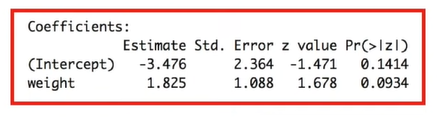
</div>


### Continuous Variables

This type of logistic regression is closely related to Linear Regression. 

For facilitation purposes, linear regression does not have a specific  domain and range limit: with the line fit to the model, it can actually predict null and negative values even for parameters that shouldn't behave like that (for instance, it can predict the size of a mouse with weight 0, or negative weight, etc). 

In logistic regression, the y-axis is confined between 0 and 1. To solve this problem, the y-axis is transformed from the "probability of obesity" to the "log(odds of obesity), so it can go from -inf to +inf.

We do this transformation using the <b>_logit function_</b>

$$log(odds) = log(\frac{p}{1-p})$$



<div>
    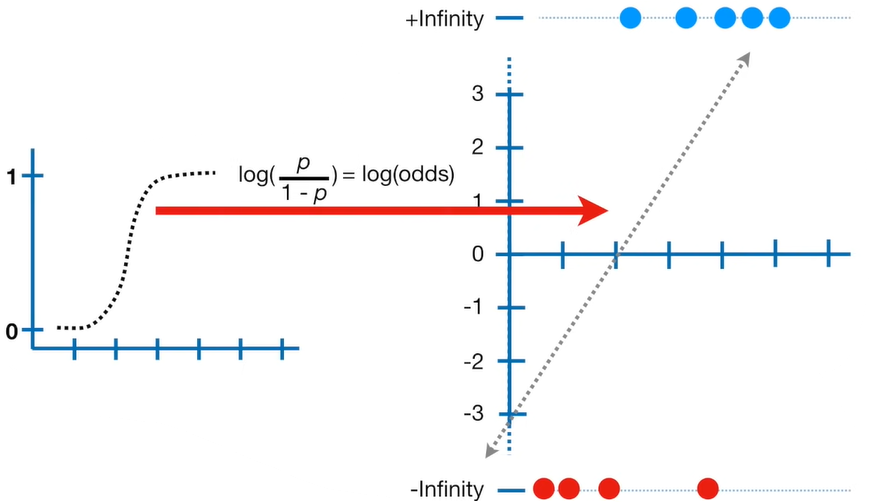
</div>


Even though we associate logistic regression with the squiggly line, its coefficients are taken from the log(odds) graph.

Just like Linear Regression, the line in the log(odds) graph has an intercept and a slope. <b>These coefficients are what you get when you do logistic regression.</b>

### Discrete Variables

<div>
    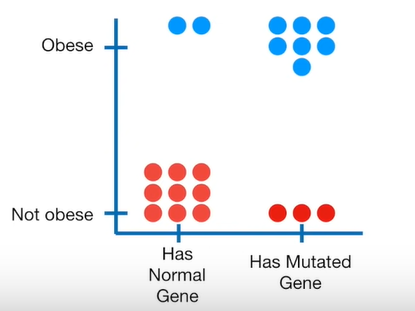
</div>


Similar to how a t-test is done.

Again, we first convert the y-axis from the probability of target to the log(odds of target).

<div>
    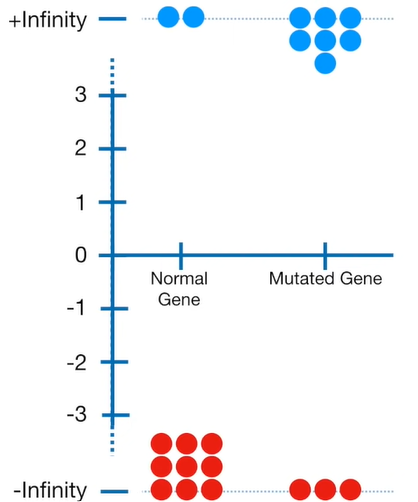
</div>

Then, we fit two lines to the data:

The first line is fit to the first class &rarr; log(odds first_class)


<div>
    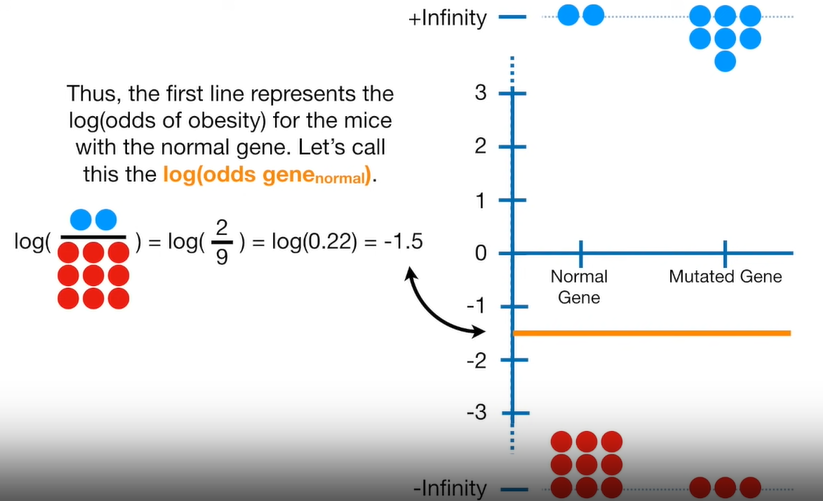
</div>

Then we fit the second line to the second class 

<div>
    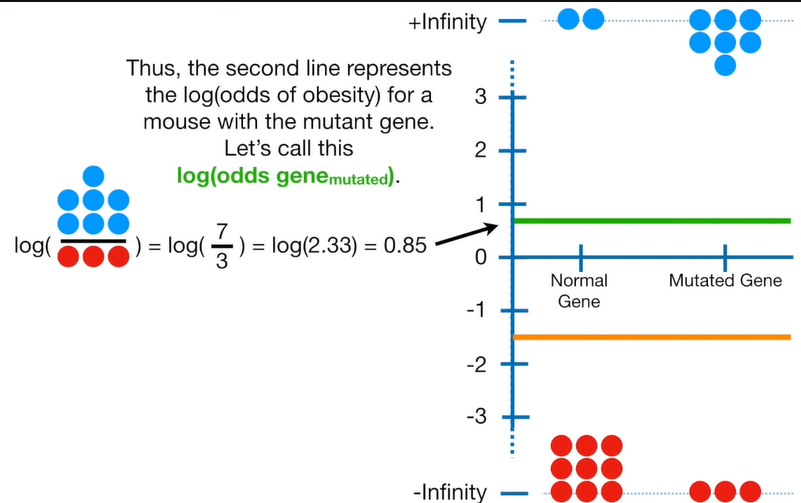
</div>

Then, these two lines are used as coefficients to predict target. For this case, we want to predict the size based on the presence of normal or mutated gene: $$size = log(oddsGene_{normal})\times B_1 +(log(oddsGene_{mutated})-log(oddsGene_{normal}))\times B_2 = log(oddsGene_{normal})\times B_1 + log(\frac{oddsGene_{mutated}}{oddsGene_{normal}})\times B_2 $$

It tells, in a log scale, how much having the mutated gene increases/decreases the odds of a mouse being obese.

Substituting the odds of the data into this equation will give us two coefficients, which again will be the ones we get when we do logistic regression.

<div>
    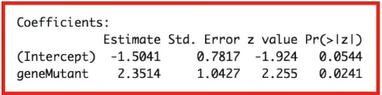
</div>

The intercept will be the $log(oddsGene_{normal})$ and the "geneMutant" will be the log(odds ratio), that will tell how much the mutate gene affects the odds of being obese.

## Logistic Regression: Fitting a Line using Maximum Likelihood

With the log(odds) tranformation, the raw data is pushed to positive and negative inf. Thus, calculating the residuals to a fitted line will also be infinite, so we cannot use least squares &rarr; we use <b>maximum likelihood</b>

 1) project the original data onto the candidate line
 
<div>
    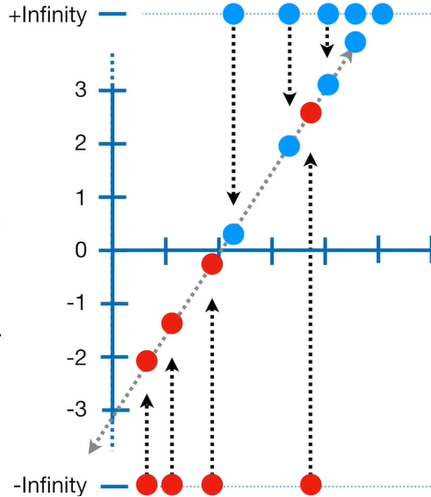
</div>

 2) Transform the candidate log(odds) back into probabilities: $$p = \frac{e^{log(odds)}}{1+e^{log(odds)}}$$
 
 
<div>
    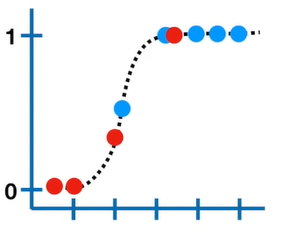
</div>

 3) Now, we used the observed (and its classes) values to calculate their likelihood given the shape of the squiggly line
 
<div>
    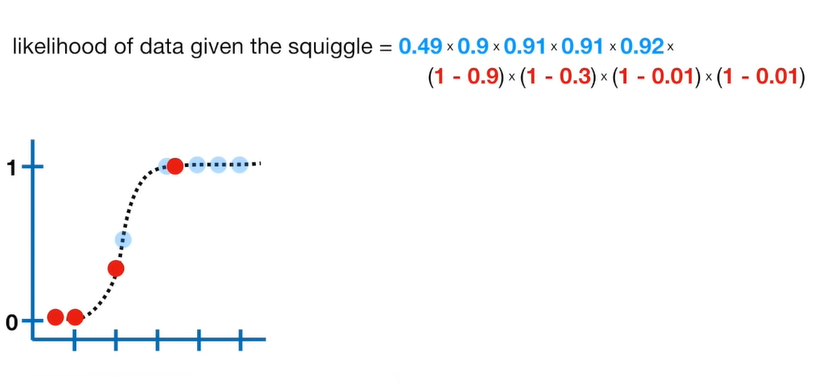
</div>


 4) Keep rotating the line until the maximum likelihood is found.

### Logistic Regression: R² and p-values

For this example, we will use one commonly used: _McFadden's Pseudo R²_

$$R^2=\frac{LL(overallProbability)-LL(fit)}{LL(overallProbability)}$$

Where LL is the loglikelihood

#### p-values

$$2(LL(fit)-LL(overallProbability) \sim \chi_{n_{fit}-n_{overall}}$$

Where n is the degrees of freedom for each model.

# Softmax Regression

AKA _Multinomial Logistic Regression_, its the generalization of the Logistic Regression to support multiple classes directly.

For an instance x, Softmax Regression first computes a score s_k(x) for each class k, then estimates the probability of each class by applying the _softmax function_ (also called _normalized exponential) to the scores

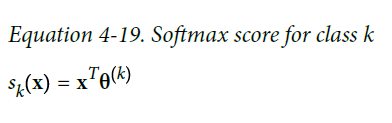

The Softmax Regression classifier predicts only one class at a time
(i.e., it is multiclass, not multioutput) so it should be used only with
mutually exclusive classes such as different types of plants. You
cannot use it to recognize multiple people in one picture.